In [1]:
import xarray as xr 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import netCDF4 
import glob 
from glob import glob

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cmocean
import cmocean.cm as cmo

In [2]:
filenames = glob('../../MODEL_DATA/*.nc')
filenames

['../../MODEL_DATA\\TXLA2.ocn.his.2022_05_06_a.nc']

In [3]:
#open files to look at them 
ds = xr.open_dataset('../../MODEL_DATA\\TXLA2.ocn.his.2022_05_06_a.nc')
nc = netCDF4.Dataset('../../MODEL_DATA\\TXLA2.ocn.his.2022_05_06_a.nc')

In [4]:
#take some time to click around on the output bellow and loos at what the file contains.
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    file: /scratch/user/d.kobashi/projects/ROFS/projects/txla2/outputs/TXLA2.ocn.his.2022_05_06_a.nc
    format: netCDF-4/HDF5 file
    Conventions: CF-1.4, SGRID-0.3
    type: ROMS/TOMS history file
    title: TXLA Regional Ocean Forecast Sysetm (ROFS) with dyes and oxygen
    var_info: varinfo.dat
    rst_file: /scratch/user/d.kobashi/projects/ROFS/projects/txla2/outputs/TXLA2.ocn.rst.2022_05_06_a.nc
    avg_file: /scratch/user/d.kobashi/projects/ROFS/projects/txla2/outputs/TXLA2.ocn.avg.2022_05_06_a.nc
    sta_file: /scratch/user/d.kobashi/projects/ROFS/projects/txla2/outputs/TXLA2.ocn.stn.2022_05_06_a.nc
    grd_file: /scratch/user/d.kobashi/projects/ROFS/projects/txla2/inputs/grids/txla2_grd_v4_test_lcut_hglo_wtype.nc
    ini_file: /scratch/user/d.kobashi/projects/ROFS/projects/txla2/inputs/ini/txla2.ini.2022_05_06_a.nc
    frc_file_01: /scratch/user/d.kobashi/projects/ROFS/projects/txla2/inputs/

In [5]:
ds = xr.open_dataset('../../MODEL_DATA\\TXLA2.ocn.his.2022_05_06_a.nc')
ds = ds.ocean_time[4]
ds

<xarray.DataArray 'ocean_time' ()>
array('2022-05-06T05:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    ocean_time  datetime64[ns] 2022-05-06T05:00:00
Attributes:
    long_name:  time since initialization
    field:      time, scalar, series

In [6]:
plt.pcolormesh(ds['lon_rho'], ds['lat_rho'], ds['salt'])

KeyError: 'lon_rho'

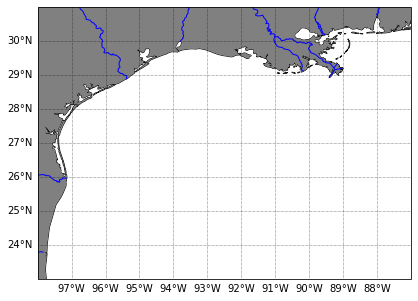

In [25]:
# Change this!
lat_top=31
lat_bot=23
lon_left=-98
lon_rigth=-87
extent=[lon_left, lon_rigth, lat_bot, lat_top]

res = '10m'

#Figure

fig = plt.figure(figsize=(10,5)) # set fig size. You will probably want to change this
ax = fig.add_subplot(111, projection=ccrs.PlateCarree()) #set cartographic projection. There are a bunch
ax.set_extent(extent) # set the extent, or the box of the map
ax.coastlines(res) # set coastilines, and resolution 

#land
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='land',
                                            facecolor='grey', # change color here
                                            scale=res)) 
#Rivers
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='rivers_lake_centerlines',
                                            edgecolor='blue', # change color here
                                            facecolor='none',
                                            scale=res))

#Gir. Only if you want one:
gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                  ylocs=np.arange(lat_bot, lat_top+1),
                  draw_labels=True, 
                  linewidth=0.5, color='k', linestyle=':')
gl.top_labels = gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [41]:
def plot_mapbase(extent, res='10m', projection=ccrs.PlateCarree()):
    fig = plt.figure(figsize=(10,5)) # set fig size
    ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue', # change color here
                                                facecolor='none',
                                                scale=res))
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'white'}
    gl.ylabel_style = {'size': 15, 'color': 'white'}
    return fig, ax

KeyError: 'lon'

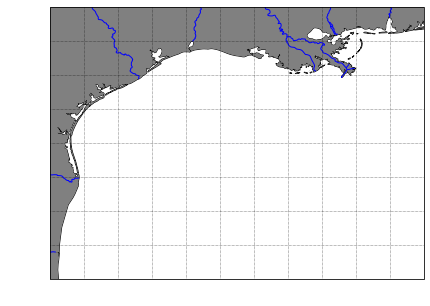

In [42]:
# you could also plot your satelite data on top of this, after loading your netcdf dataset

fig, ax = plot_mapbase(extent)
satdata = ax.pcolormesh(ds['lon'], ds['lat'], ds['a_412_giop'], cmap=cmo.matter, transform=ccrs.PlateCarree())
cb = fig.colorbar(satdata)
cb.set_label('Surface Water\n'+'a$_{CDOM}$ (412 nm) (1/m)', size=20, weight='bold', color='w')
tick_font_size = 16
cb.ax.tick_params(labelsize=tick_font_size)


fig.set_size_inches(18.5, 10.5)

#fig.savefig('../MAPS_Figures/BC_flux_WC_412.png')